<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Indian_Unicorn_Startups_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('Indian Unicorn startups 2023 updated.csv')

In [3]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [4]:
print(df.describe())

              No.  Entry Valuation^^ ($B)  Valuation ($B)
count  102.000000              102.000000      102.000000
mean    51.500000                1.547549        3.398020
std     29.588849                1.138013        4.710657
min      1.000000                1.000000        0.568000
25%     26.250000                1.000000        1.200000
50%     51.500000                1.200000        1.850000
75%     76.750000                1.582500        3.475000
max    102.000000               10.000000       37.600000


In [5]:
sector_counts=df['Sector'].value_counts()
print(sector_counts)

Edtech                                      5
Marketplace - Used Cars                     4
E-Commerce                                  4
Logistics Services                          4
Gaming                                      3
                                           ..
Fintech - Payments & Credit Card Rewards    1
E-Commerce - Online Pharmacy                1
Fintech - Brokerage & Mutual Funds          1
Social Media                                1
Healthtech - Diagnostics                    1
Name: Sector, Length: 75, dtype: int64


In [6]:
average_valuation=df['Valuation ($B)'].mean()
print("Average Valuation:$",average_valuation)

Average Valuation:$ 3.3980196078431373


In [7]:
print(df.dtypes)

No.                         int64
Company                    object
Sector                     object
Entry Valuation^^ ($B)    float64
Valuation ($B)            float64
Entry                      object
Location                   object
Select Investors           object
dtype: object


In [8]:
unique_location=df['Location'].nunique()

print("Unique Location",unique_location)

Unique Location 27


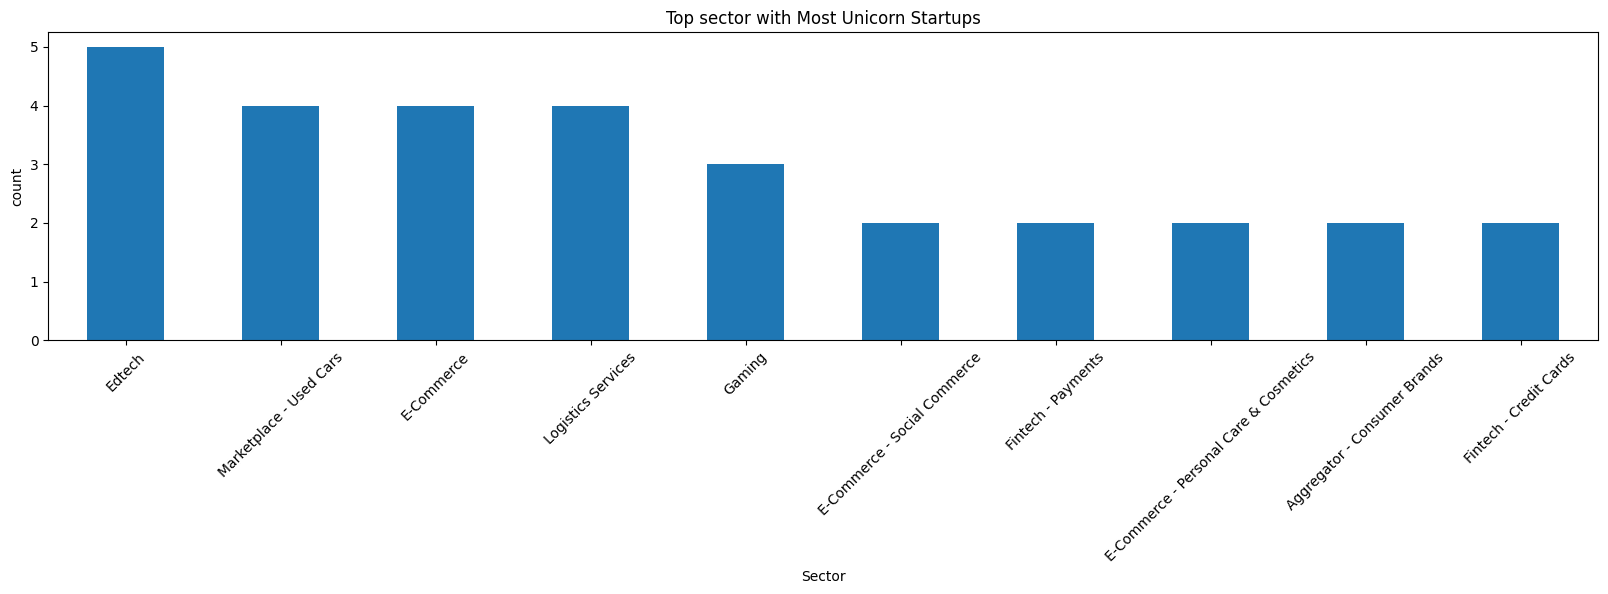

In [9]:
import matplotlib.pyplot as plt

top_sector_counts=sector_counts.head(10)
plt.figure(figsize=(20,4))
top_sector_counts.plot(kind='bar')
plt.title('Top sector with Most Unicorn Startups')
plt.xlabel('Sector')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [10]:
median_valuation_by_sector=df.groupby('Sector')['Valuation ($B)'].median()
print(median_valuation_by_sector)

Sector
Adtech - Mobile Ads                         1.00
Aggregator - Consumer Brands                1.15
Aggregator - Logistics Services             1.23
B2B E-Commerce                              3.10
B2B E-Commerce - Construction Materials     2.50
                                           ...  
SaaS - Software Testing                     4.00
SaaS - Subscription Billing Solution        3.50
Social Media                                4.90
Social Media - Messaging                    1.40
Web3 Infrastructure - Dapps                10.00
Name: Valuation ($B), Length: 75, dtype: float64


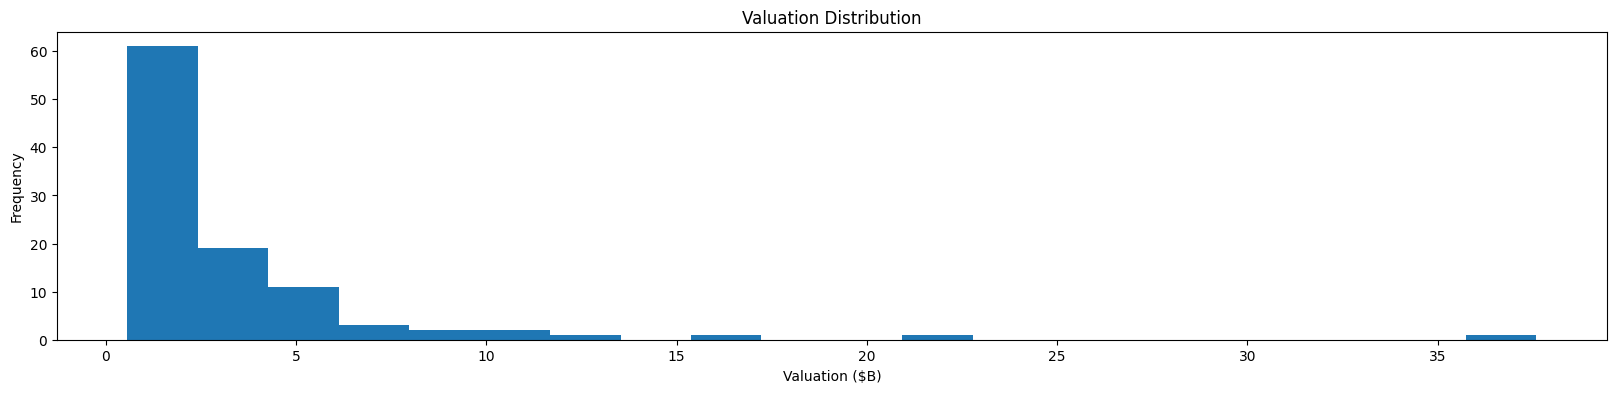

In [11]:
plt.figure(figsize=(20,4))
plt.hist(df['Valuation ($B)'],bins=20)
plt.title('Valuation Distribution')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

In [12]:
total_funding=df.groupby('Company')['Valuation ($B)'].sum()
print(total_funding)

Company
Acko                 1.10
Amagi Media Labs     1.00
Apna.co              1.10
BYJUS               22.00
BharatPe             2.80
                    ...  
Zenoti               1.50
Zeta                 1.50
Zetwerk              2.50
Zomato^              5.40
upGrad               2.25
Name: Valuation ($B), Length: 102, dtype: float64


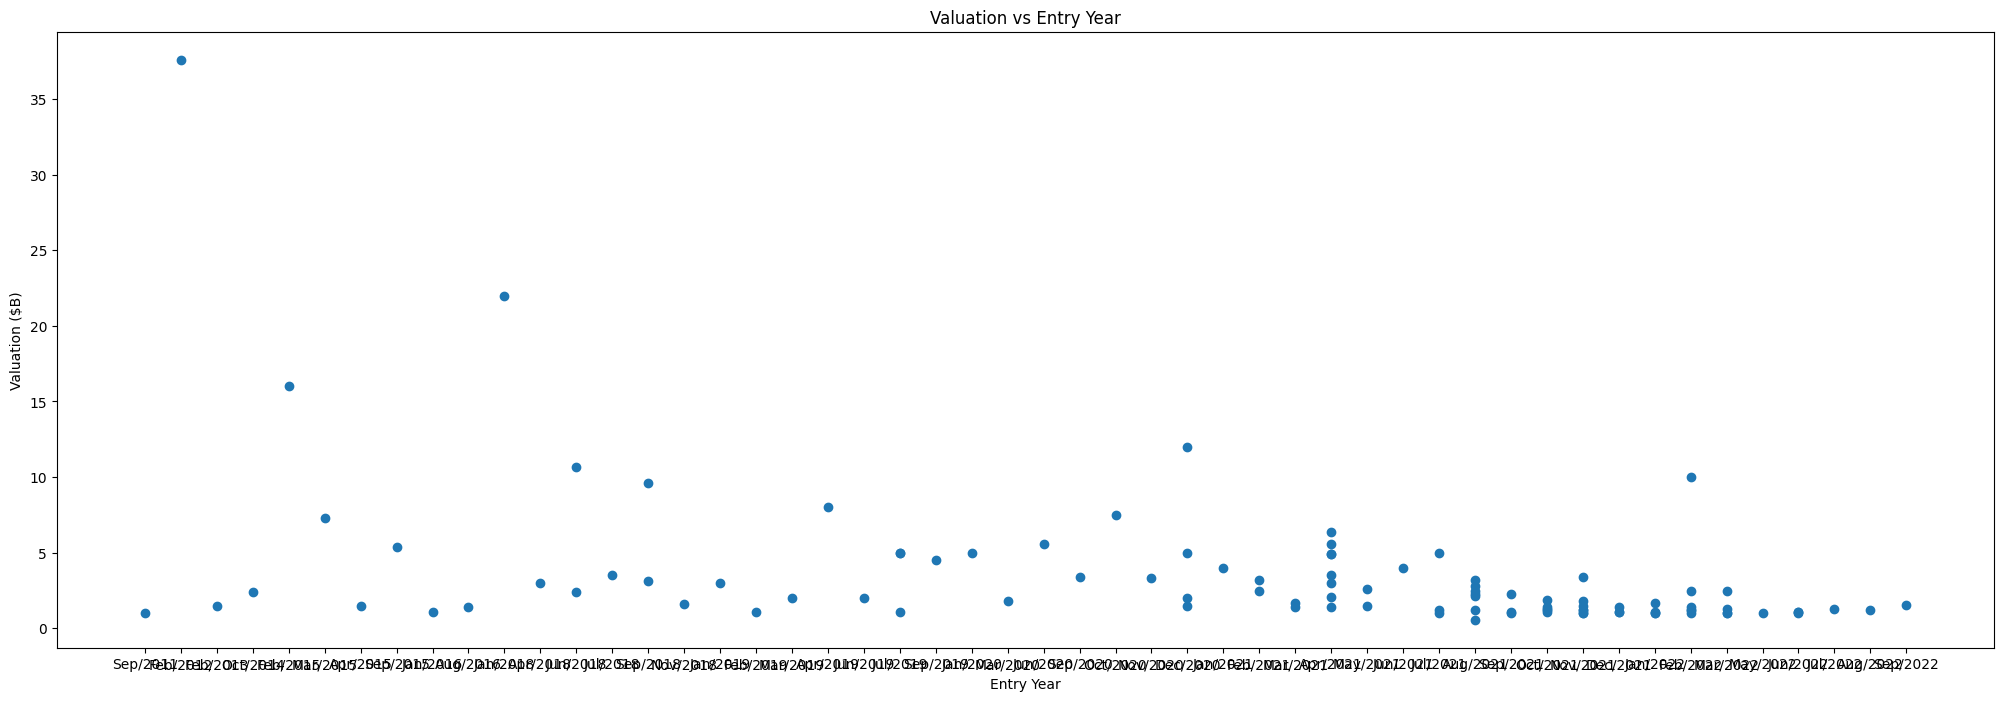

In [13]:
plt.figure(figsize=(25,8))
plt.scatter(df['Entry'],df['Valuation ($B)'])
plt.title('Valuation vs Entry Year')
plt.xlabel('Entry Year')
plt.ylabel('Valuation ($B)')
plt.show()

In [14]:
top_valued_startups=df.nlargest(5,'Valuation ($B)')
print(top_valued_startups[['Company','Sector','Valuation ($B)']])

      Company                       Sector  Valuation ($B)
1   Flipkart^                   E-Commerce            37.6
10      BYJUS                       Edtech            22.0
4      PayTM^  Fintech - Payments & Wallet            16.0
33   PhonePe^           Fintech - Payments            12.0
12     Swiggy                     Foodtech            10.7


In [15]:
average_valuation_by_sector=df.groupby('Sector')['Valuation ($B)'].mean()
print(average_valuation_by_sector)

Sector
Adtech - Mobile Ads                         1.00
Aggregator - Consumer Brands                1.15
Aggregator - Logistics Services             1.23
B2B E-Commerce                              3.10
B2B E-Commerce - Construction Materials     2.50
                                           ...  
SaaS - Software Testing                     4.00
SaaS - Subscription Billing Solution        3.50
Social Media                                4.90
Social Media - Messaging                    1.40
Web3 Infrastructure - Dapps                10.00
Name: Valuation ($B), Length: 75, dtype: float64


<Figure size 28000x128000 with 0 Axes>

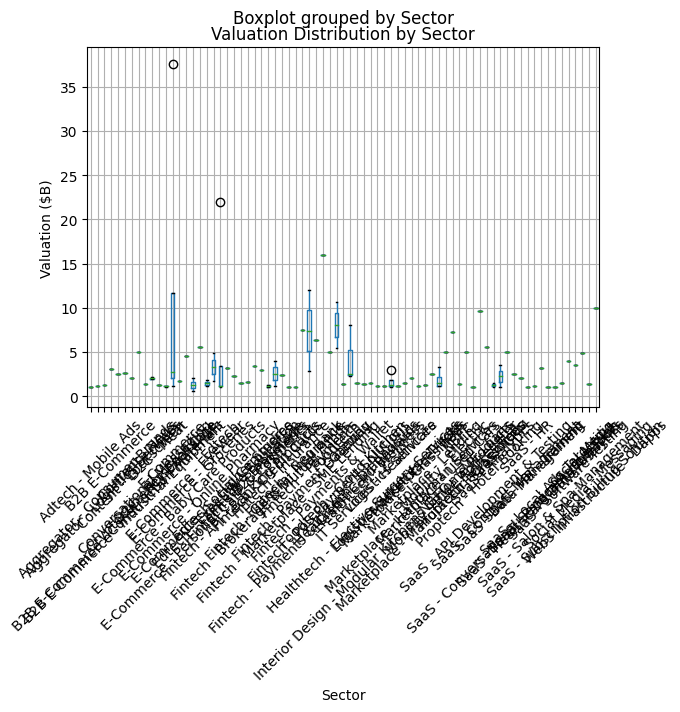

In [16]:
plt.figure(figsize=(280,1280))
df.boxplot(column='Valuation ($B)',by='Sector')
plt.title('Valuation Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Identify the top 5 investors with the highest number of investments
top_investors = df['Select Investors'].str.split(', ', expand=True).stack().value_counts().head(5)
print(top_investors)

Tiger Global             38
Sequoia Capital India    25
SoftBank                 20
Accel India              15
Steadview Capital        14
dtype: int64


In [18]:
average_entry_valuation_by_sector = df.groupby('Sector')['Entry Valuation^^ ($B)'].mean()
print(average_entry_valuation_by_sector)

Sector
Adtech - Mobile Ads                         1.00
Aggregator - Consumer Brands                1.15
Aggregator - Logistics Services             1.23
B2B E-Commerce                              1.00
B2B E-Commerce - Construction Materials     1.00
                                           ...  
SaaS - Software Testing                     4.00
SaaS - Subscription Billing Solution        1.40
Social Media                                2.10
Social Media - Messaging                    1.40
Web3 Infrastructure - Dapps                10.00
Name: Entry Valuation^^ ($B), Length: 75, dtype: float64


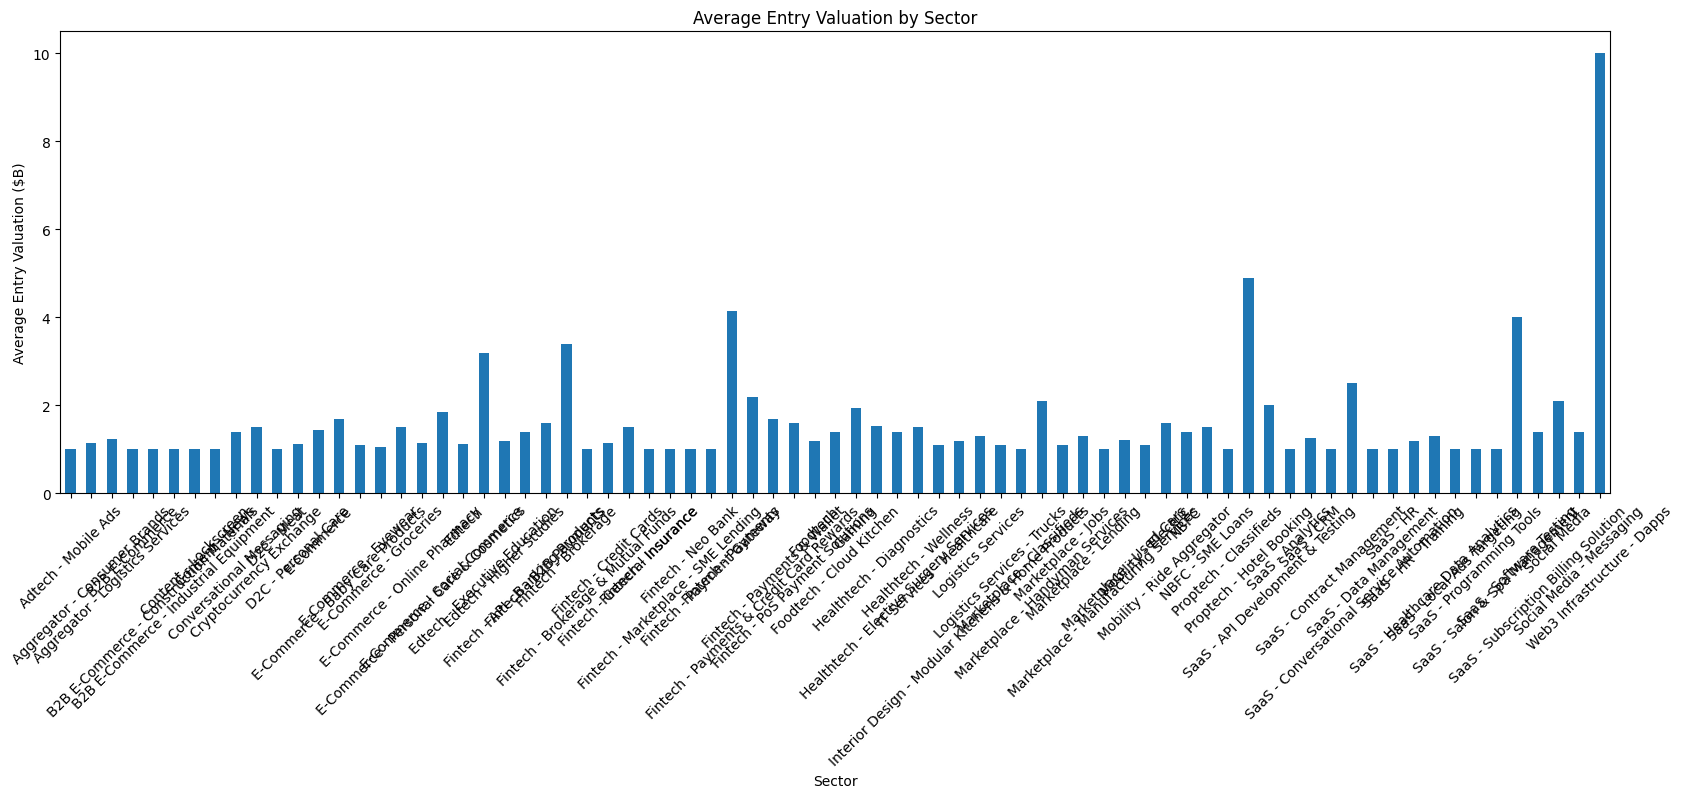

In [19]:
plt.figure(figsize=(20,6))
average_entry_valuation_by_sector.plot(kind='bar')
plt.title('Average Entry Valuation by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Entry Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

In [20]:
startups_per_year=df['Entry'].value_counts().sort_index()
print(startups_per_year)

Apr/2015    1
Apr/2018    1
Apr/2019    1
Apr/2021    8
Aug/2016    1
Aug/2021    7
Aug/2022    1
Dec/2020    4
Dec/2021    3
Feb/2012    1
Feb/2013    1
Feb/2015    1
Feb/2019    1
Feb/2021    2
Feb/2022    6
Jan/2016    1
Jan/2018    1
Jan/2019    1
Jan/2020    1
Jan/2021    1
Jan/2022    4
Jul/2018    1
Jul/2019    3
Jul/2021    3
Jul/2022    1
Jun/2018    2
Jun/2019    1
Jun/2020    1
Jun/2021    1
Jun/2022    3
Mar/2015    1
Mar/2019    1
Mar/2020    1
Mar/2021    2
Mar/2022    4
May/2021    2
May/2022    1
Nov/2018    1
Nov/2020    1
Nov/2021    7
Oct/2014    1
Oct/2020    1
Oct/2021    5
Sep/2011    1
Sep/2015    1
Sep/2018    2
Sep/2019    1
Sep/2020    1
Sep/2021    3
Sep/2022    1
Name: Entry, dtype: int64


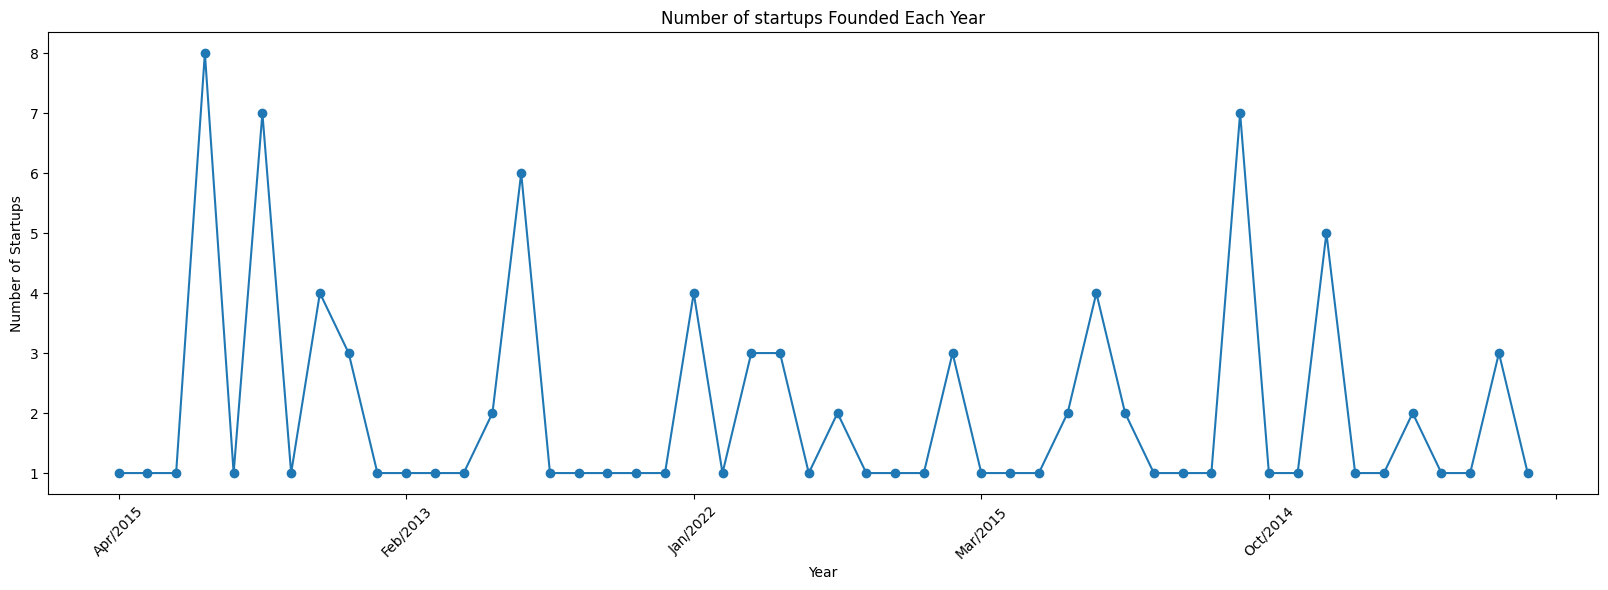

In [21]:
plt.figure(figsize=(20,6))
startups_per_year.plot(kind='line',marker='o')
plt.title('Number of startups Founded Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.columns

Index(['No.', 'Company', 'Sector', 'Entry Valuation^^ ($B)', 'Valuation ($B)',
       'Entry', 'Location', 'Select Investors'],
      dtype='object')

In [23]:
top_valued_sectors = df.groupby('Sector')['Valuation ($B)'].sum().nlargest(5)
print(top_valued_sectors)

Sector
E-Commerce                     44.1
Edtech                         28.6
Foodtech                       16.1
Fintech - Payments & Wallet    16.0
Fintech - Payments             14.8
Name: Valuation ($B), dtype: float64


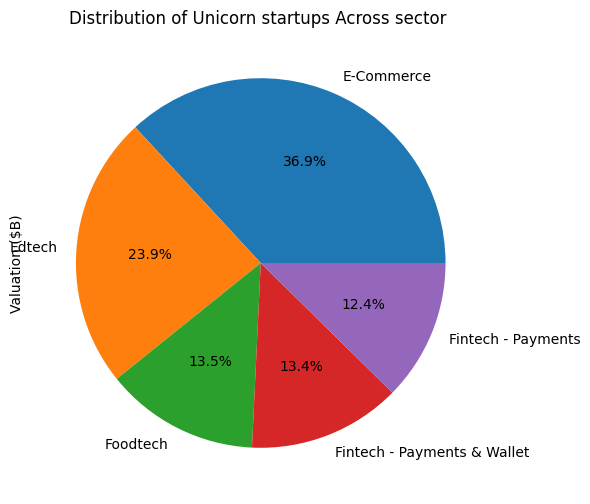

In [24]:
plt.figure(figsize=(8,6))
top_valued_sectors.plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Unicorn startups Across sector ')
plt.show()

In [25]:
average_funding_by_sector=df.groupby('Sector')['Valuation ($B)'].mean()
print(average_funding_by_sector)

Sector
Adtech - Mobile Ads                         1.00
Aggregator - Consumer Brands                1.15
Aggregator - Logistics Services             1.23
B2B E-Commerce                              3.10
B2B E-Commerce - Construction Materials     2.50
                                           ...  
SaaS - Software Testing                     4.00
SaaS - Subscription Billing Solution        3.50
Social Media                                4.90
Social Media - Messaging                    1.40
Web3 Infrastructure - Dapps                10.00
Name: Valuation ($B), Length: 75, dtype: float64


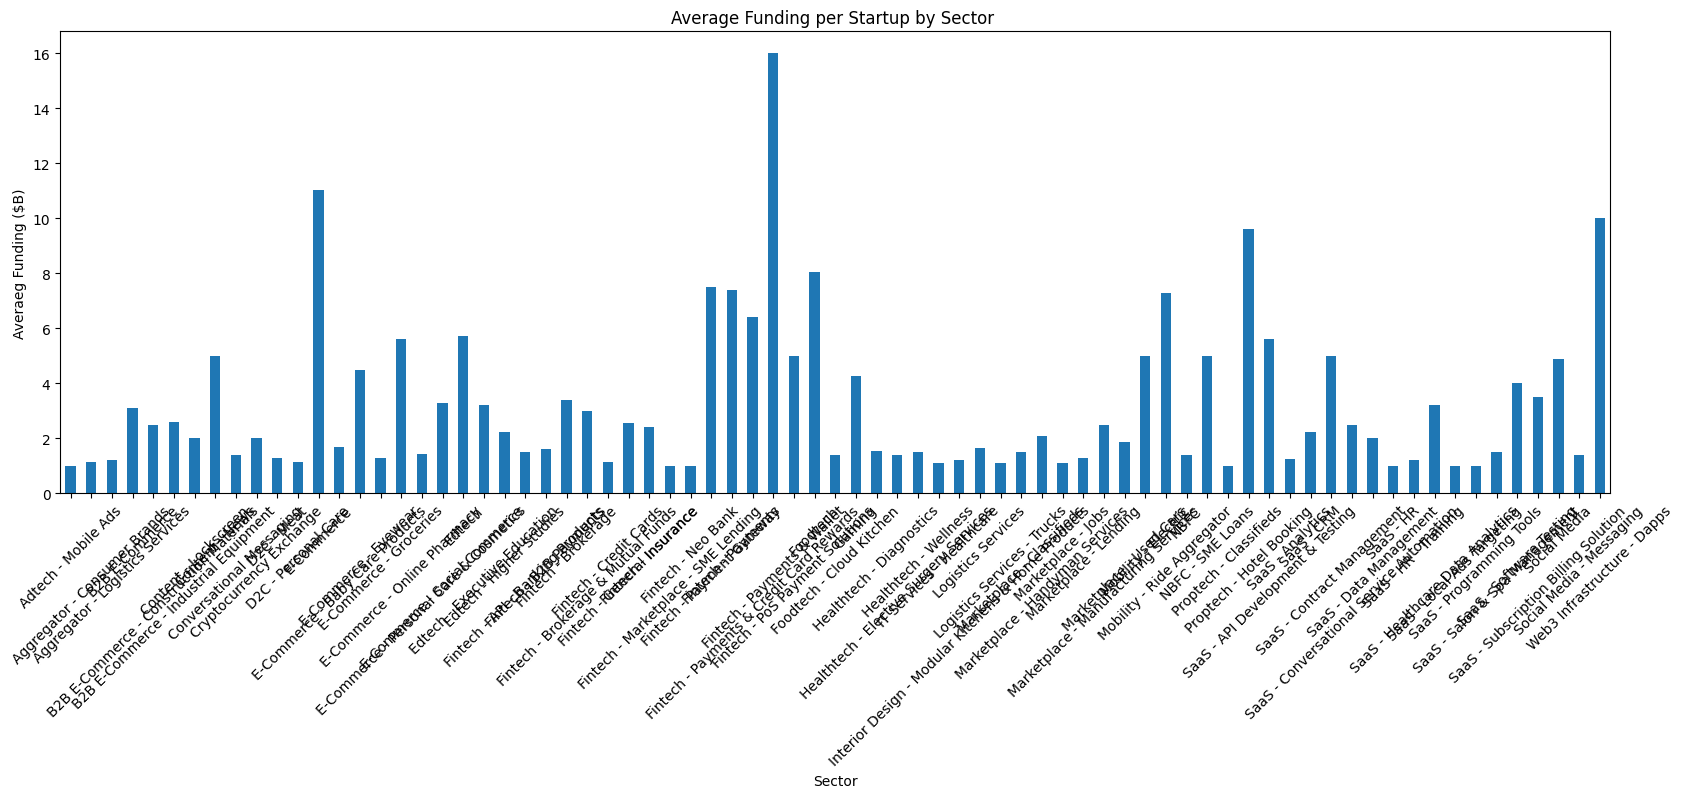

In [26]:
plt.figure(figsize=(20,6))
average_funding_by_sector.plot(kind='bar')
plt.title('Average Funding per Startup by Sector ')
plt.xlabel('Sector')
plt.ylabel('Averaeg Funding ($B)')
plt.xticks(rotation=45)
plt.show()

In [27]:
location_counts=df['Location'].value_counts()
print(location_counts)

Bangalore                  34
Gurgaon                    14
Mumbai                     12
Delhi                       7
Pune                        4
Noida                       4
Bangalore/San Francisco     3
Bangalore/Singapore         3
Jaipur                      2
Chennai                     2
Chennai/San Francisco       1
Mumbai/New York             1
Chennai/Palo Alto           1
Mumbai/Singapore            1
Mumbai/Dublin               1
Noida/Singapore             1
Hyderabad/Singapore         1
Noida/San Francisco         1
Mumbai/San Francisco        1
Thane                       1
Bangalore/Chicago           1
Hyderabad/Bellevue          1
Mumbai/Princeton            1
Pune/Bellevue               1
Pune/Sunnyvale              1
Chennai/San Mateo           1
Goa                         1
Name: Location, dtype: int64


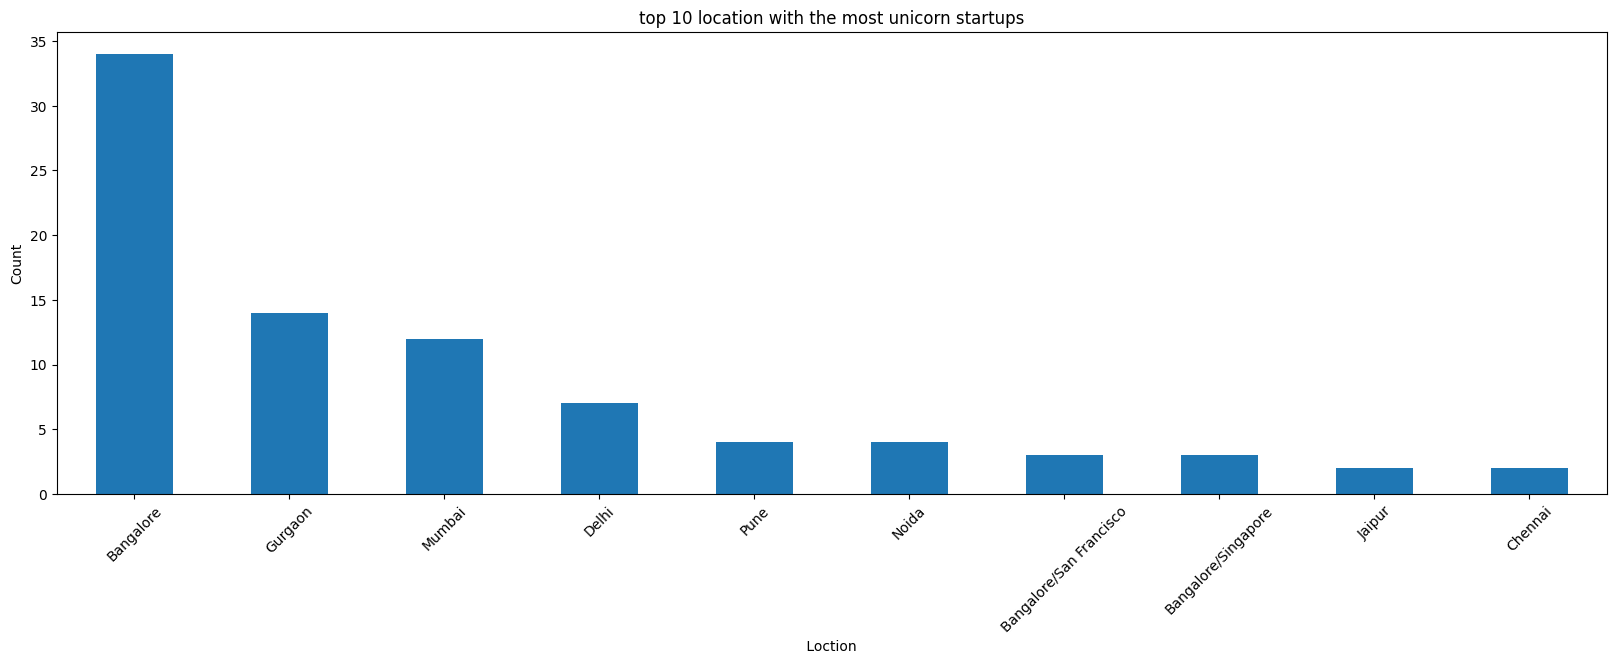

In [28]:
top_location_counts=location_counts.head(10)
plt.figure(figsize=(20,6))
top_location_counts.plot(kind='bar')
plt.title('top 10 location with the most unicorn startups')
plt.xlabel(' Loction ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

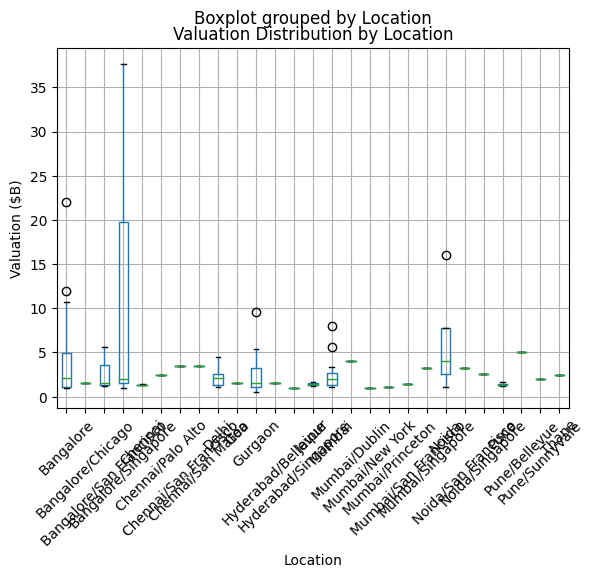

In [29]:
plt.figure(figsize=(10,6))
df.boxplot(column='Valuation ($B)',by='Location')
plt.title('Valuation Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

In [30]:
startups_per_year=df['Entry'].value_counts().sort_index()


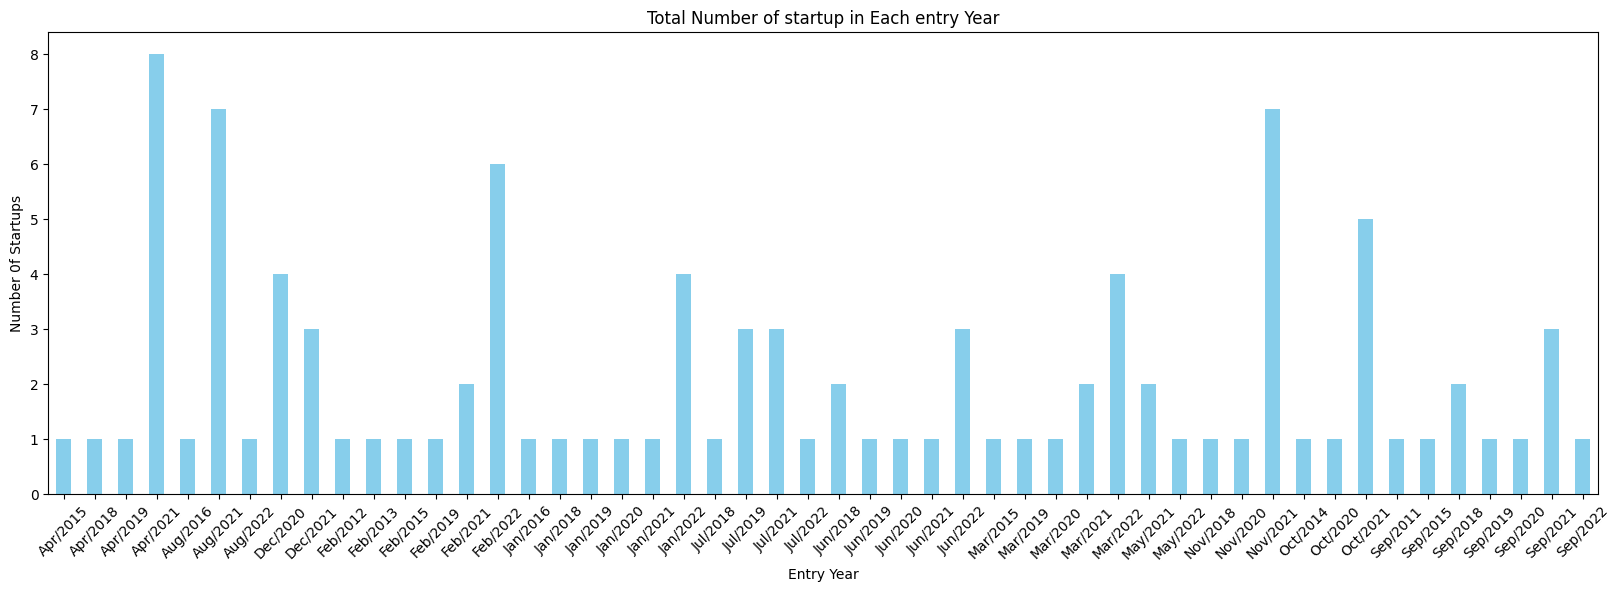

In [31]:
plt.figure(figsize=(20,6))
startups_per_year.plot(kind='bar',color='skyblue')
plt.title('Total Number of startup in Each entry Year')
plt.xlabel('Entry Year')
plt.ylabel('Number 0f Startups')
plt.xticks(rotation=45)
plt.show()

In [32]:
total_valuation_per_year = df.groupby('Entry')['Valuation ($B)'].sum()

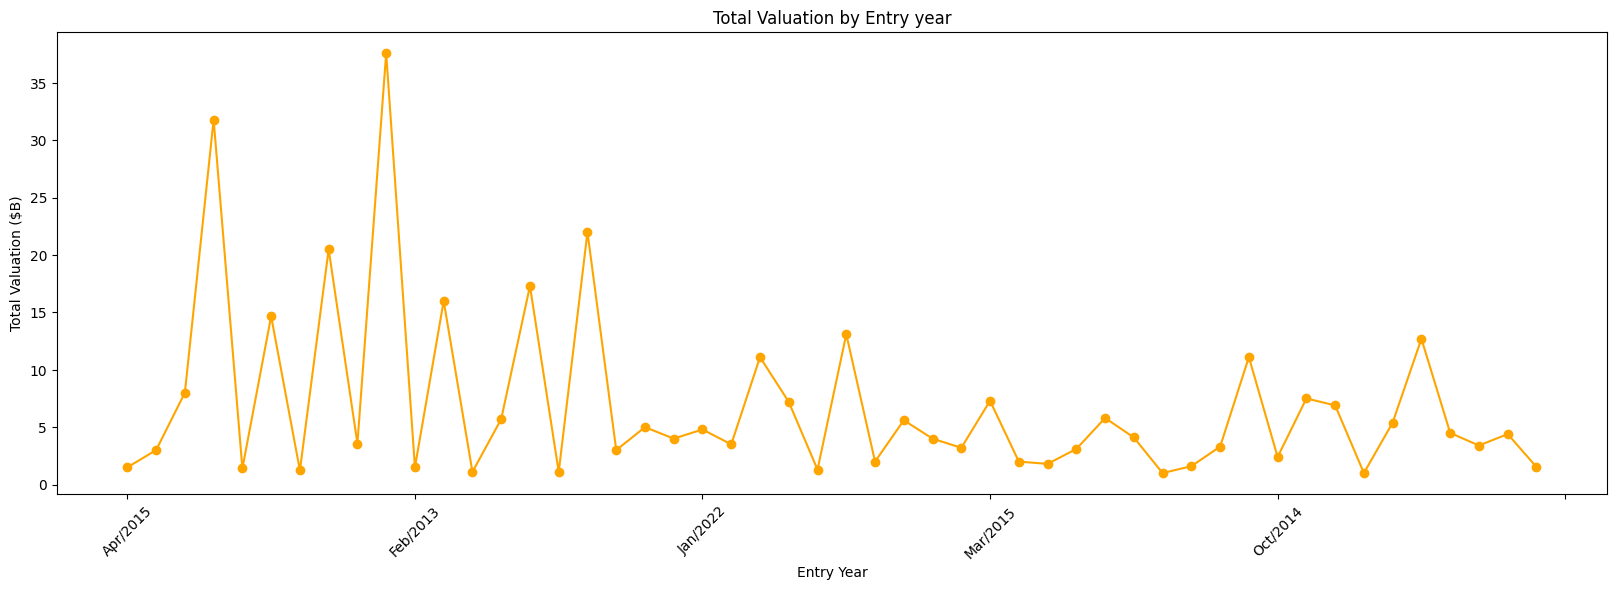

In [33]:
plt.figure(figsize=(20,6))
total_valuation_per_year.plot(kind='line',marker='o',color='orange')
plt.title('Total Valuation by Entry year')
plt.xlabel('Entry Year')
plt.ylabel('Total Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

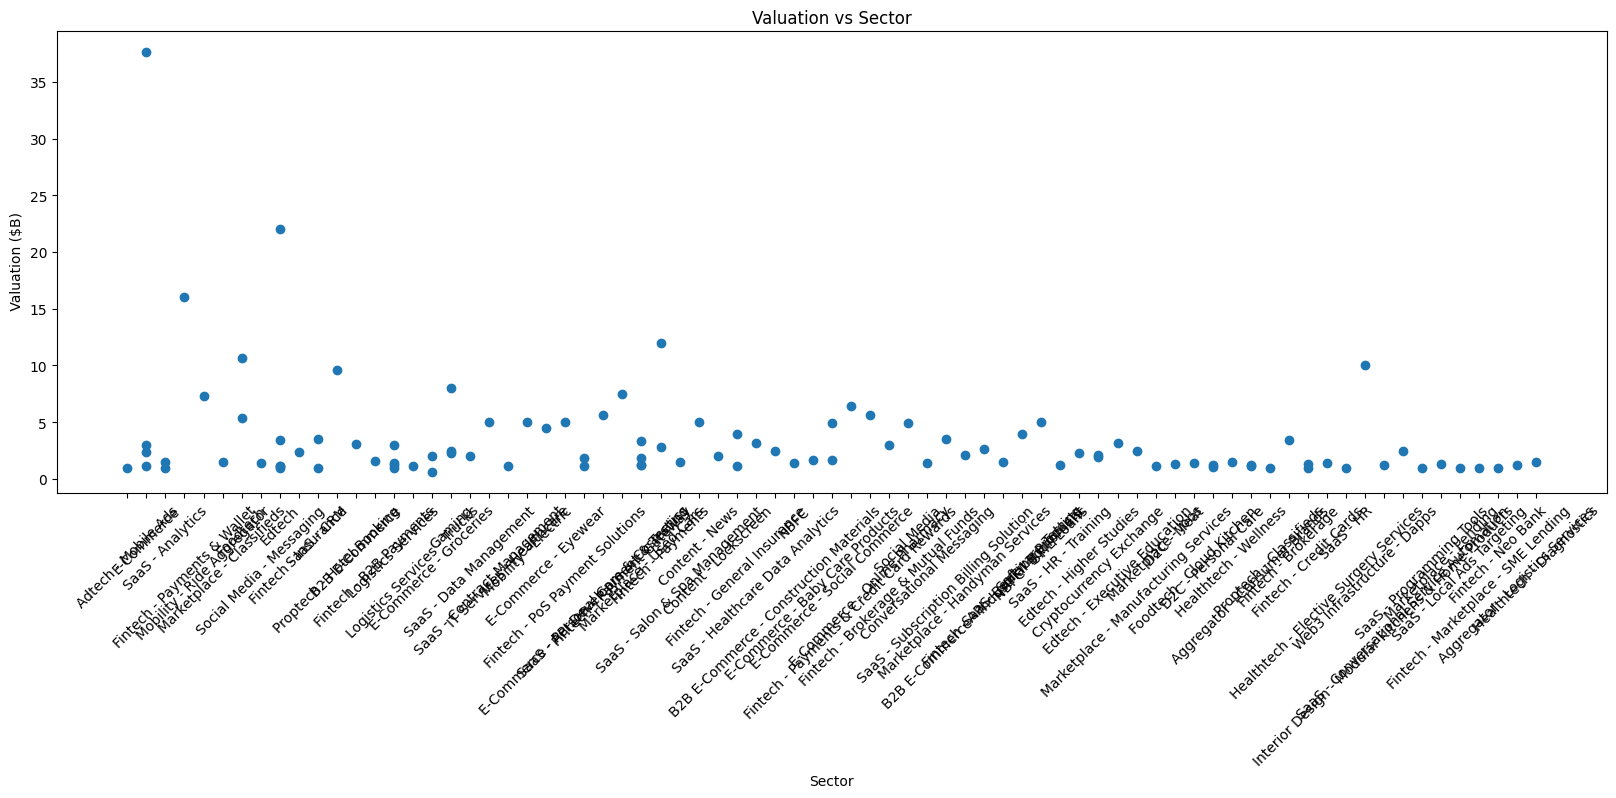

In [34]:
plt.figure(figsize=(20,6))
plt.scatter(df['Sector'],df['Valuation ($B)'])
plt.title('Valuation vs Sector')
plt.xlabel('Sector')
plt.ylabel(' Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

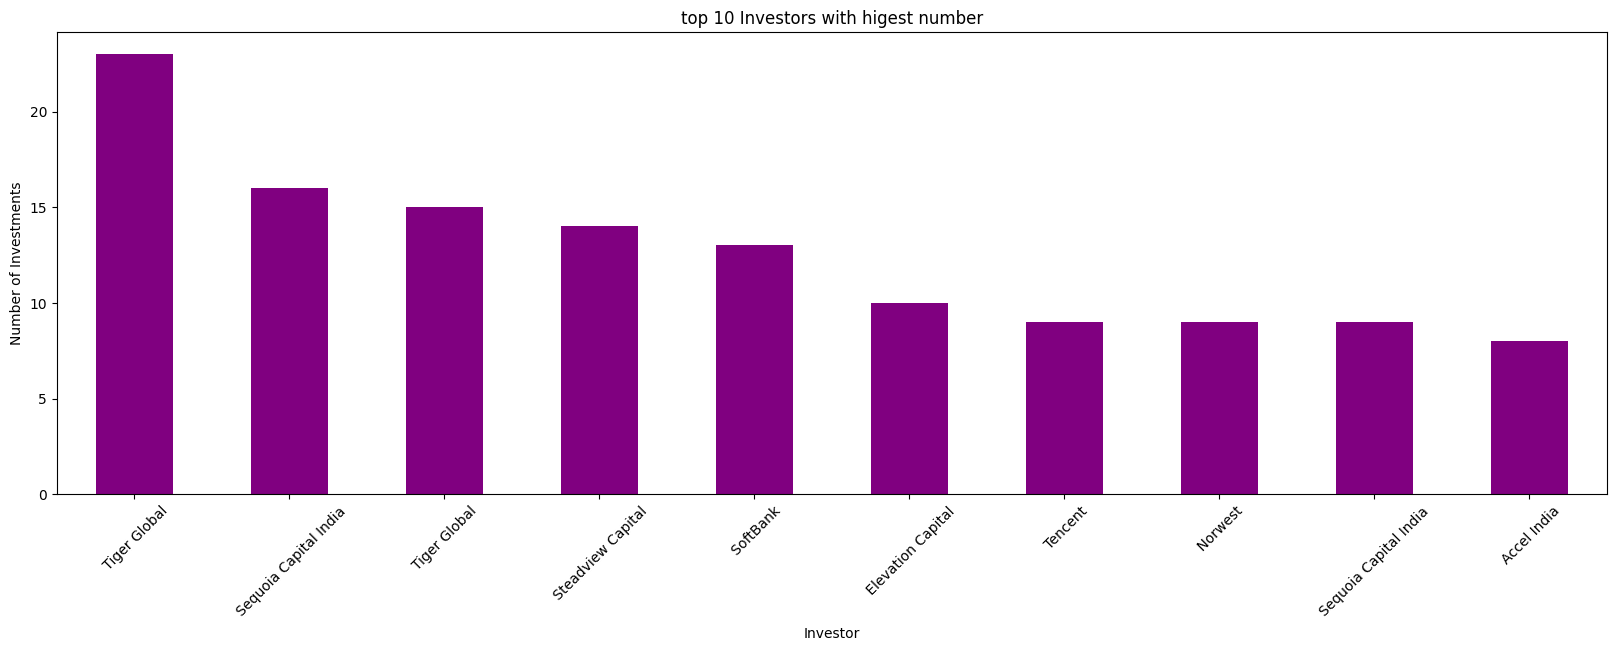

In [35]:
top_investors=df['Select Investors'].str.split(',',expand=True).stack().value_counts().head(10)
plt.figure(figsize=(20,6))
top_investors.plot(kind='bar',color='purple')
plt.title('top 10 Investors with higest number')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

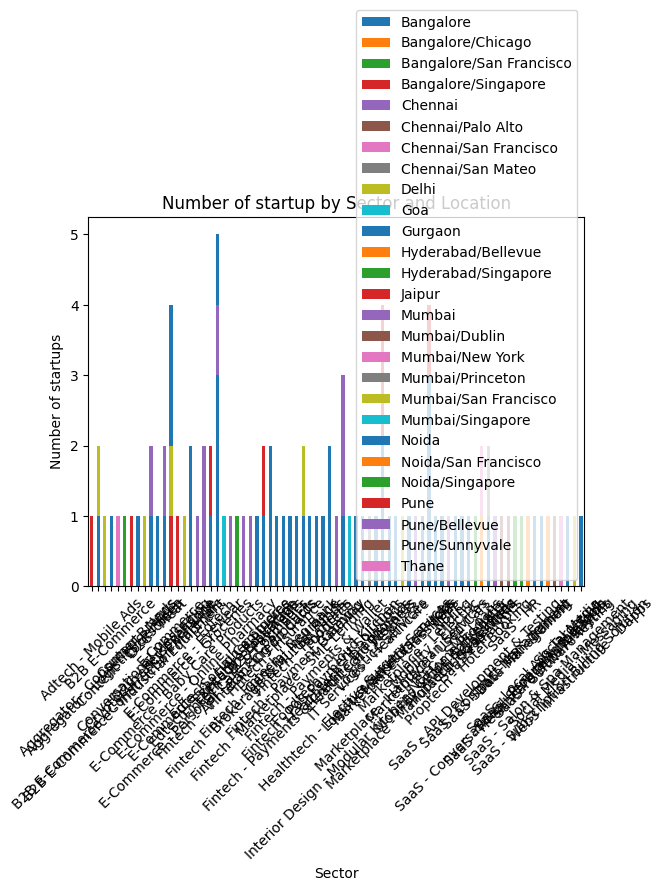

In [37]:
sector_location_counts=df.groupby(['Sector','Location']).size().unstack()
plt.figure(figsize=(12,6))
sector_location_counts.plot(kind='bar',stacked=True)
plt.title('Number of startup by Sector and Location')
plt.xlabel('Sector')
plt.ylabel('Number of startups')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [40]:
import seaborn as sns
custom_palette=['#4287f5','#f54242','#42f554','#42f554','#f5e842','#42e1f5']
sns.set_palette(custom_palette)

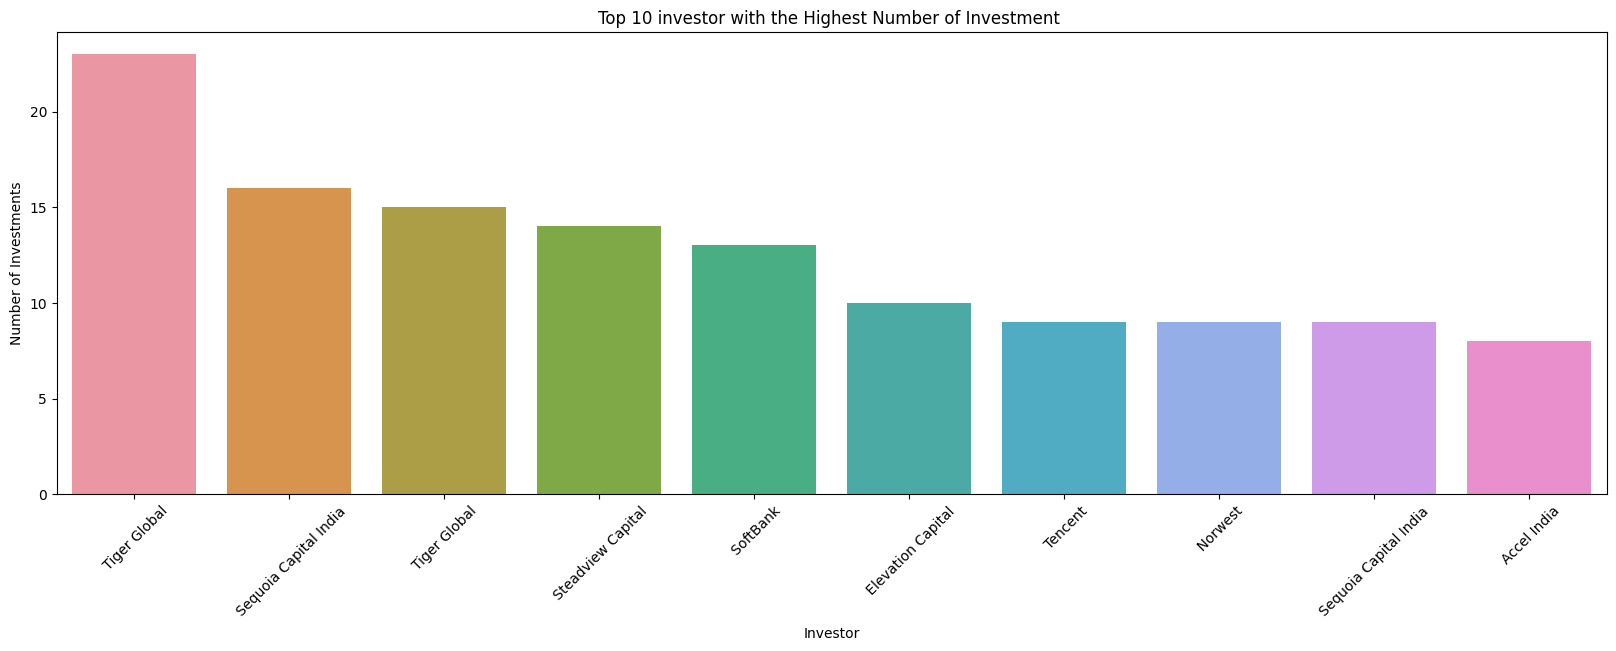

In [42]:
plt.figure(figsize=(20,6))
sns.barplot(x=top_investors.index,y=top_investors.values)
plt.title('Top 10 investor with the Highest Number of Investment ')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45)
plt.show()

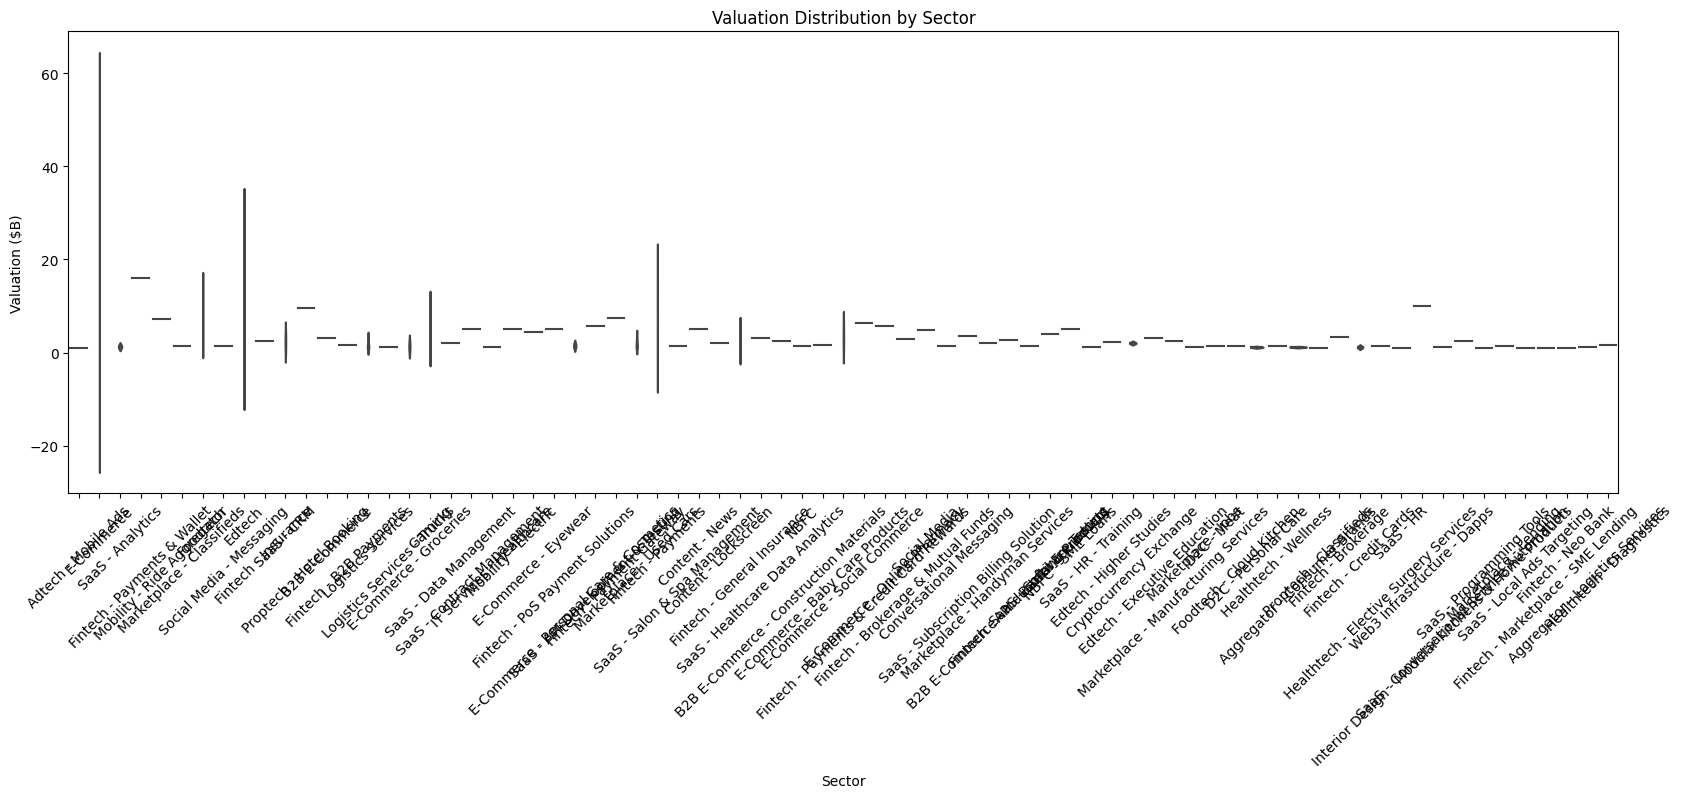

In [43]:
plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x='Sector', y='Valuation ($B)', inner='quartile')
plt.title('Valuation Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

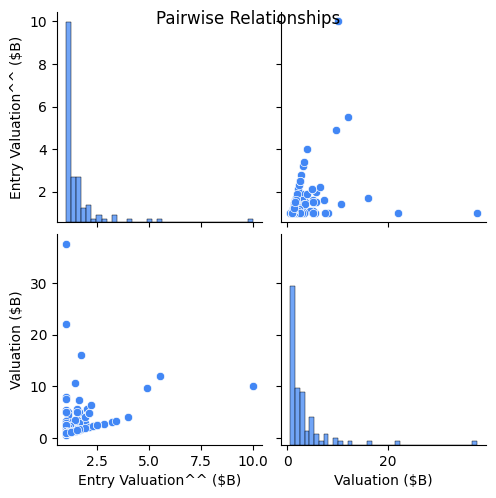

In [45]:
numeric_columns = ['Entry Valuation^^ ($B)', 'Valuation ($B)', 'Entry']
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairwise Relationships')
plt.show()

<ipython-input-46-f34d33e069fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')


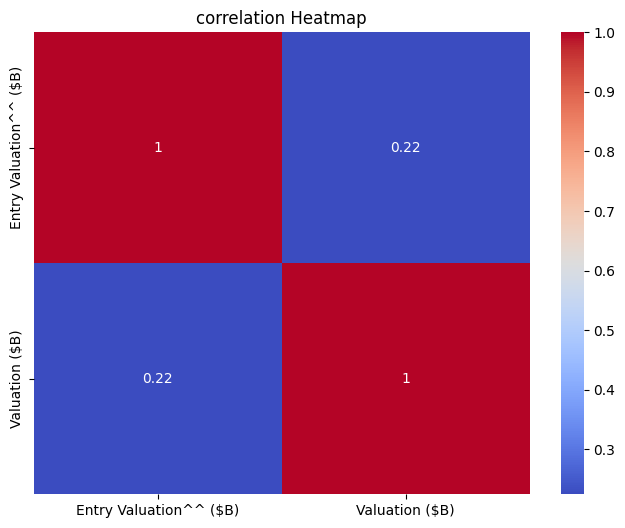

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()